In [47]:
# Compare Kostis's lorentziator with my particle_tracer.py


from myutils import restore, get_vlsvfile_fullpath
import numpy as np
import pytools as pt
import ftest as ft
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

R_E = 6.371e6
run = 'EGI'
#t_0 = 1000
t_0 = 1199


##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_BorisA.pickle")   # dt = gyroperiod/100
dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_odeint.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x11.5_y0.0_z0.0.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_TEST_0_electron_nt_200_x11.5_y0.0_z0.0.pickle")
#vlsv = ft.f('/wrk-vakka/users/horakons/carrington/data/particle_tracer/vlsv/E_0_-1_0_e-3_B_0_0_1_e-8.vlsv')
vlsv = ft.f(get_vlsvfile_fullpath('EGI', t_0))


nt = 3000 #200
dt = dct['t'][0][0][0] - dct['t'][0][0][1]#    -0.0005
t = t_0 + np.arange(nt+1) * dt
x = np.array(dct["x"])/R_E
v = np.array(dct["v"])


x_init = x[:,:,0,:]   # [8,8,3]
v_init = v[:,:,0,:]

nv = 8
# write initial conditions to a comma delimited .txt file 
f = open("/wrk-vakka/users/horakons/carrington/data/particle_tracer/input_trace_compare.txt", "w")
for i in range(nv):
    for j in range(nv):
        if (i == (nv-1)) & (j == (nv-1)):
            suffix = ""
        else:
            suffix = "\n"
        f.write("{},{},{},{},{},{}".format(x_init[i,j,0],x_init[i,j,1],x_init[i,j,2],
                                           v_init[i,j,0],v_init[i,j,1],v_init[i,j,2])+suffix)
f.close()

# then, before running lorentziator:
# cp /wrk-vakka/users/horakons/carrington/data/particle_tracer/input_trace_compare.txt /wrk-vakka/users/horakons/lorentziator/test_configs/input.txt

#For this run, the contents of ini_vlasiator_d.cfg should look like:
'''
[time]
time_end=1198.9
time_start=1199
tout=0.0005

[hardware]
type=CPU

[restart]
restart = 0

[Input]
file=1


 etc.

                                                                                                                                                                                                                                        
'''




Found population proton


'\n[time]\ntime_end=1198.9\ntime_start=1199\ntout=0.0005\n\n[hardware]\ntype=CPU\n\n[restart]\nrestart = 0\n\n[Input]\nfile=1\n\n\n etc.\n\n                                                                                                                                                                                                                                        \n'

In [60]:
# Read Lorentziator simulation data, from range of times

nv = 8 # 81
import ptrReader


start_ti = 0
end_ti = 30

xl = np.zeros([nv, nv, end_ti-start_ti+1, 3])
vl = np.zeros([nv, nv, end_ti-start_ti+1, 3])

for ti in range(start_ti, end_ti+1):
    print(ti)
    #p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9/population.{}.ptr'.format(str(ti).zfill(7)))
    #p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9_x19RE/population.{}.ptr'.format(str(ti).zfill(7)))
    #xl[:,:,ti,:] = p.pos().reshape([nv,nv,3])   # shape (nv^2, 3) -> (nv,nv,3)
    #vl[:,:,ti,:] = p.vel().reshape([nv,nv,3])   # shape (nv^2, 3) -> (nv,nv,3)
    x2,y2,z2,vx2,vy2,vz2 = ptrReader.read_ptr2_file('/wrk-vakka/users/kpapadak/tracer/test_run/population.{}.ptr2'.format(str(ti).zfill(7)))
    xl[:,:,ti,0]=x2.reshape([nv,nv])/R_E; xl[:,:,ti,1]=y2.reshape([nv,nv])/R_E; xl[:,:,ti,2]=z2.reshape([nv,nv])/R_E
    vl[:,:,ti,0]=vx2.reshape([nv,nv]); vl[:,:,ti,1]=vy2.reshape([nv,nv]); vl[:,:,ti,2]=vz2.reshape([nv,nv])




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [61]:
print(x[0,0,20*100,:])
print(xl[0,0,20,:])
x.shape; xl.shape   # agree pretty well!

[1.29867282e+01 9.60977457e-03 7.41086364e-01]
[ 1.30086522e+01 -1.05335408e-02 -7.18196781e-01]


(8, 8, 31, 3)

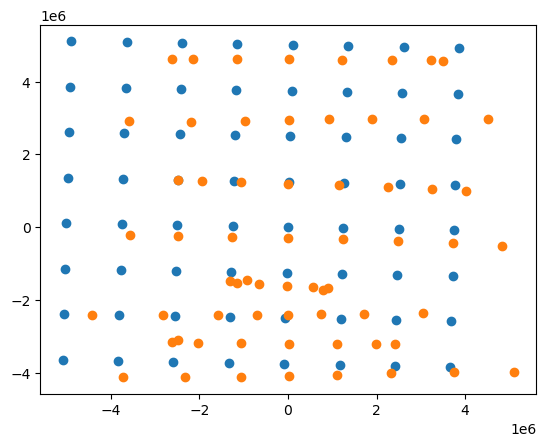

In [63]:
plt.scatter(vl[:,:,0,1], vl[:,:,0,2])   # in the magnetosheath, B~Bz, so particles mostly move in x-y plane
plt.scatter(vl[:,:,-1,1], vl[:,:,-1,2])

15-May-24 12:15:13: /wrk-vakka/users/horakons/tmp/ipykernel_1216636/3382745831.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  t_e = 2 * np.pi / omega_e  # gyroperiod



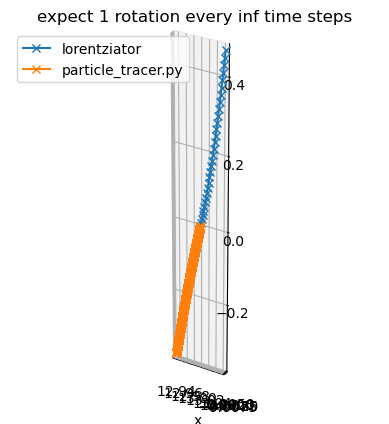

inf

In [65]:
omega_e = (1.60217663e-19 / 9.1093837e-31 ) * np.linalg.norm(vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:]))
t_e = 2 * np.pi / omega_e  # gyroperiod

i = 5; j = 5    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
yoffset = 0  # 1e4/R_E

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
inds = range(0,200,1)
ax.plot(xl[i,j,:,0], xl[i,j,:,1], xl[i,j,:,2], marker = 'x', label = 'lorentziator')  # lorentziator
ax.plot(x[i,j,:,0], x[i,j,:,1], x[i,j,:,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
#ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
#ax.plot(x[i,j,inds,0], x[i,j,inds,1], x[i,j,inds,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
ax.set_aspect('equal')
ax.set_xlabel('x')
plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
plt.legend()
plt.show()
t_e

In [66]:
xl[4,4,inds,:] - x[4,4,inds,:]

IndexError: index 31 is out of bounds for axis 2 with size 31

In [67]:
# Lorentz factor
gamma = 1 / np.sqrt(1- (np.linalg.norm(vl, axis =-1) / 3e8)**2)
np.nanmax(gamma)

1.0002860038867458

In [68]:
#xtest = np.array([-19, 0,0]) * R_E
xtest =  x[i,j,0,:]      # i.c. @ i=4, j=4:  vpar=vperp=0
vg_v = vlsv.read_interpolated_variable('proton/vg_v', xtest)
print(vg_v)
print(vl[i, j, 0, :])
print('diff. btw e- init. vel. and proton vel.:', vg_v - vl[i, j, 0, :])   # initial delta_v wrt proton bulk flow


[0. 0. 0.]
[ -248409.09457423  1220842.8447202  -1281381.7609914 ]
diff. btw e- init. vel. and proton vel.: [  248409.09457423 -1220842.8447202   1281381.7609914 ]


In [69]:
# Does the electron drift motion for vpar=vper=0 electron match the ExB drift?
#xtest = np.array([15, 0,0]) * R_E


# Do either of these methods account for the different grid centerings of E and B?
# method 1: my fsgrid interpolation
from carrington_beta_star import interpolator_list_3d
interpolators = interpolator_list_3d(vlsv, vlsv.read_variable('fg_e'), bounds_error = False, fill_value = np.nan)
E = np.array([interpolators[0](xtest)[0], interpolators[1](xtest)[0], interpolators[2](xtest)[0]])
interpolators_B = interpolator_list_3d(vlsv, vlsv.read_variable('fg_b'), bounds_error = False, fill_value = np.nan)
B = np.array([interpolators_B[0](xtest)[0], interpolators_B[1](xtest)[0], interpolators_B[2](xtest)[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2)

'''
# method 2: analysator's fsgrid interpolation
E = np.array([vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='z')[0]])
B = np.array([vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='z')[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2) 
'''

nv = 8

v_ExB = np.cross(E, B) / (np.linalg.norm(B))**2
B_hat = B / np.linalg.norm(B)
E_hat = E / np.linalg.norm(E)
vpar_i = np.outer(np.dot(np.array(dct['v_i']), B_hat), B_hat).reshape(nv,nv,3)  # initial parallel velocity, [npar, nper, 3] array
v_ExB, vpar_i[5,4, :]
print(t_0)
print(B)
print(E)


Did not find FsGrid decomposition from vlsv file.
Calculating fsGrid decomposition from the file


In [18]:
print(v_ExB, vg_v)
'''
dx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py 
dxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator
dx_ExB = v_ExB * nt * dt
print(dx)
print(dxl)
print(dx_ExB)
'''

[-151064.69877224    1400.13086176   11254.39929019] [-164311.96370117    2046.34876411  -88136.00771289]


'\ndx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py \ndxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator\ndx_ExB = v_ExB * nt * dt\nprint(dx)\nprint(dxl)\nprint(dx_ExB)\n'

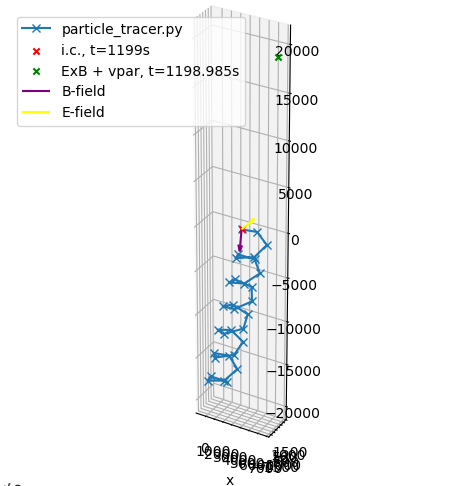

In [40]:
fig = plt.figure()
i=5; j = 7    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
ax = fig.add_subplot(111, projection = '3d')
nt_plot = 30
inds = range(0,nt_plot+1,1)
#ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
ax.plot(x[i,j,inds,0], x[i,j,inds,1], x[i,j,inds,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
dx_ExB_plot = v_ExB * nt_plot * dt
dx_vpar_i_plot = vpar_i[i, j, :] * nt_plot * dt
dx_plot = dx_ExB_plot + dx_vpar_i_plot
x_f = x[i,j,inds[0],:] + dx_plot
ax.scatter( x[i,j,0,0], x[i,j,0,1], x[i,j,0,2], marker = 'x', label = 'i.c., t=1199s', color = 'red')  # particle_tracer.py
ax.scatter( x_f[0], x_f[1], x_f[2], marker = 'x', label = 'ExB + vpar, t={}s'.format(t_0+nt_plot*dt), color = 'green')  # particle_tracer.py
ax.set_aspect('equal')
#ax.scatter(*points.T[0], color = 'red')
ax.set_xlabel('x')
#plt.title(r'i.c. {}, t= {}, $x = [11.5, 0, 0] R_E$, $v_\parallel=v_\perp = 0$ '.format(run, t_0))
#plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
quiv_len = np.linalg.norm(x_f)/1e6*nt_plot
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          B_hat[0], B_hat[1], B_hat[2], length=quiv_len, normalize=True, color ='purple', label = 'B-field')
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          E_hat[0], E_hat[1], E_hat[2], length=quiv_len, normalize=True, color ='yellow', label = 'E-field')
plt.legend()
plt.tight_layout()
plt.show()

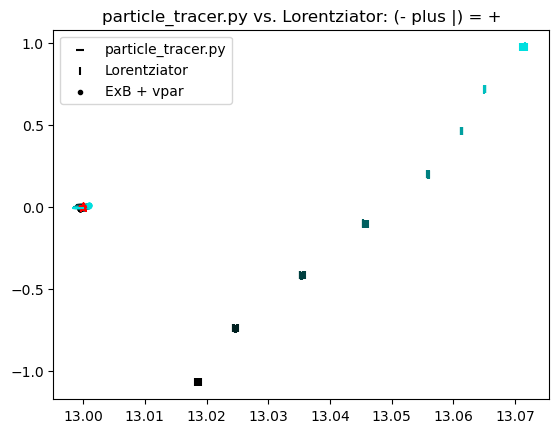

In [24]:


for i in range(nv):
    for j in range(nv):
        dx_ExB_plot = v_ExB * (end_ti - start_ti) * dt
        dx_vpar_i_plot = vpar_i[i, j, :] * (end_ti - start_ti) * dt
        dx_plot = dx_ExB_plot + dx_vpar_i_plot
        x_f = x[i,j,inds[0],:] + dx_plot

        plt.scatter(x[i,j,start_ti,0]/R_E, x[i,j,start_ti,2]/R_E, color = "red", marker = '*')  # x-z
        if (i+j) == 0:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_", label = 'particle_tracer.py')  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|", label = 'Lorentziator')  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".", label = 'ExB + vpar')  # x-z
        else:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_")  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|")  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".")  # x-z
        plt.legend()
        plt.title('particle_tracer.py vs. Lorentziator: (- plus |) = +')
        #plt.plot(x[i,j,:,0]/R_E, x[i,j,:,2]/R_E, color = (0, i/nv, j/nv))  # x-z

In [25]:
dct.keys()
vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:])

array([-1.05661370e-09, -1.77355755e-10, -1.56938596e-08])

In [26]:
np.linalg.norm(vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:]))

1.5730388302087442e-08

In [27]:
dct['t'][1][1]

array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 1.4990e+00, 1.4995e+00,
       1.5000e+00])

In [28]:
B_hat = B / np.linalg.norm(B)
np.dot(dct['v_i'][3][3], B_hat)


-1237448.0327158098

In [29]:
v_par_i = np.outer(np.dot(np.array(dct['v_i']), B_hat), B_hat).reshape(8,8,3)  # initial parallel velocity, [npar, nper, 3] array
v_par_i[7,7:]


array([[ -282204.08969295,   -59348.72008594, -3780564.26914448]])

In [30]:
x[i,j,inds,0]/R_E, x[i,j,inds,1]/R_E, x[i,j,inds,2]/R_E

(array([13.        , 13.000141  , 13.00036597, 13.00029932, 12.99999952,
        12.99987207, 13.00006594, 13.00025182, 13.0001123 , 12.99981432,
        12.99976068]),
 array([ 0.00000000e+00,  2.08909386e-04,  9.37445371e-05, -1.85223343e-04,
        -2.23916569e-04,  2.41130872e-05,  1.78528431e-04, -1.66521340e-06,
        -2.59406811e-04, -2.22208847e-04,  4.34083389e-05]),
 array([ 0.        , -0.00030531, -0.00060561, -0.0008908 , -0.00117331,
        -0.00146957, -0.00177558, -0.00207284, -0.00235592, -0.00264051,
        -0.00294009]))

In [31]:
dct['t'][0][0]

array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 1.4990e+00, 1.4995e+00,
       1.5000e+00])

In [32]:
dct['vpar']

array([[-5000000., -5000000., -5000000., -5000000., -5000000., -5000000.,
        -5000000., -5000000.],
       [-3750000., -3750000., -3750000., -3750000., -3750000., -3750000.,
        -3750000., -3750000.],
       [-2500000., -2500000., -2500000., -2500000., -2500000., -2500000.,
        -2500000., -2500000.],
       [-1250000., -1250000., -1250000., -1250000., -1250000., -1250000.,
        -1250000., -1250000.],
       [       0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.],
       [ 1250000.,  1250000.,  1250000.,  1250000.,  1250000.,  1250000.,
         1250000.,  1250000.],
       [ 2500000.,  2500000.,  2500000.,  2500000.,  2500000.,  2500000.,
         2500000.,  2500000.],
       [ 3750000.,  3750000.,  3750000.,  3750000.,  3750000.,  3750000.,
         3750000.,  3750000.]])

In [33]:
dx_ExB_plot

array([2265.97048158,  -21.00196293, -168.81598935])

In [34]:
nt_plot

10

In [35]:
dt

-0.0005

In [59]:
xl.shape

(8, 8, 3001, 3)